# Sinais em tempo contínuo e tempo discreto

_Luis Caldas de Oliveira_

Este notebook apresenta a forma de representar sinais em Python usando as bibliotecas SymPy para sinais contínuos e NumPy para sinais discretos

## Sinais em tempo contínuo

Apesar de, em certas condições, os sinais em tempo contínuo poderem ser representados em tempo discreto sem perda de informação, o tratamento geral desses sinais deve ser feito com matemática simbólica.

### Matemática simbólica em Python

O Python dispõem de um biblioteca de matemática simbólica chamada de SymPy que iremos usar ao longo deste curso. 

Tal como outras bibliotecas para a linguagem Python, a SymPy pode ser instalado com o comando `pip`.
Para usar funções SymPy num programa é preciso fazer a importação da biblioteca com a instrução `import`. No entanto, se estiver a usar este notebook no colab, a biblioteca já está instalada

In [1]:
# uncomment if necessary
# !pip install sympy

import sympy as sp
sp.init_printing()

from IPython.display import display, Math

print(sp.__version__)

1.10.1


A biblioteca SymPy distingue-se da biblioteca de matemática normal do Python (math), por não realizar os cálculos quando estes dão um resultado aproximado. Apesar de não apresentar o resultado numérico, a biblioteca SymPy simplifica-o sem perder precisão.

In [2]:
import math 

display(math.sqrt(12))
display(sp.sqrt(12))

Podemos definir uma expressão que represente uma função matemática em SymPy se primeiro definirmos como símbolos as variáveis dependentes

In [3]:
omega, t = sp.symbols('\omega, t', real=True)
func = sp.sin(omega * t)
display(func)

Para a avaliar a função faz-se a substituição da variável independente pelos valores que queremos. Neste caso $\omega = \pi / 2$ e $t=1$:

In [4]:
display(func.subs([(omega, sp.pi/2), (t, 1)]))

## Representação de sinal em tempo contínuo em SymPy

Um sinal $x_c(t)$ em tempo contínuo é uma função de uma variável contínua.
$$
\forall t \in \mathbb{R}, x(t) = \ldots
$$
na forma de uma [[função matemática]]:
$$
 x: \mathbb{R} \rightarrow \mathbb{R}
$$

Usando a biblioteca SymPy podemos representar um tom puro em tempo contínuo
$$\forall t \in \mathbb{R}, x(t) = \sin(2 \pi \times 440 t)$$
$$x: \mathbb{R} \rightarrow [-1,1] $$

Na forma

In [5]:
t = sp.symbols('t', real=True)
xc = sp.sin(2 * sp.pi * 440 * t)
display(Math('x_c(t) = ' + sp.latex(func)))

<IPython.core.display.Math object>

Podemos visualizar graficamente o sinal em tempo contínuo $x_c(t)$ para $t \in [-4 ms, 4 ms]$ 


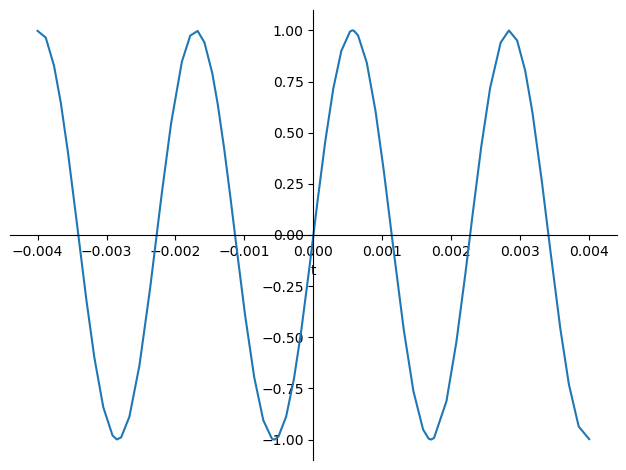

In [6]:
plt=sp.plot(xc, (t,-.004,0.004),ylabel='')

## Sinais em tempo discreto

Os sinais em tempo discreto podem ser representados com matrizes multidimensionais. Faz por isso sentido usarmos a biblioteca NumPy do Python para os representar

### Matrizes multidimensionais em Python

O NumPy é a biblioteca normalmente usada em Python quando se pretende realizar computação numérica de forma eficiente onde a estrutura de dados mais comum é a matriz multi-dimensional.

A classe `ndarray`, definida na biblioteca NumPy, permite realizar operações sobre matrizes de forma mais intuitiva e rápida do que se conseguiria, por exemplo, com a classe `list` da versão de base do Python.

O Numpy vem instalado por omissão na maioria das distribuições do Python, pelo que basta importar a biblioteca.

In [7]:
import numpy as np

a = np.array([1,2,3])
b = np.array([4,5,6])
print("a+b:", a+b)
print("a*b:", a*b)

a+b: [5 7 9]
a*b: [ 4 10 18]


As matrizes podem ter um número variável de dimensões e por isso podem funcionar como funções em que o domínio é $\mathbb{N}_0^D$. Para uma matriz tri-dimensional com $3 \times 3 \times 3$:

$$ m_{3D}: \{0, 1, 2\}^{3} \rightarrow \mathbb{R} $$

In [8]:
m3D = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
                [[5, 6, 7], [8, 9, 10], [11, 12, 13]],
                [[14, 15, 16], [17, 18, 19], [20, 21, 22]]])
print("m3D[0,0,0] = ", m3D[0,0,0])
print("m3D[2,2,2] = ", m3D[2,2,2])

m3D[0,0,0] =  1
m3D[2,2,2] =  22


### Representação de um sinal em tempo discreto em NumPy

Ao contrário do SymPy para os sinais em tempo contínuo, as matrizes do NumPy não permite a representação de sinais de duração infinita. Vimos também que os índices das matrizes começam sempre em zero.

A forma de resolver esta limitação vamos considerar o sinal em tempo discreto $x_d(n)$:
$$ x_d: \mathbb{Z} \rightarrow \mathbb{R}$$

Definido pela expressão:
$$ x_d(n) = \sin\left(\frac{2 \pi}{30} n\right)$$

Para representar este sinal usamos dois vetores. O vetor `n` contém o segmento do sinal que queremos tratar enquanto o vetor `xd` contém o valor do sinal nesse ponto.


In [9]:
n = np.arange(-30,30)
xd = np.sin(2 * np.pi * n / 30)
print('n =', n[0:3])
print('xd(n) =', xd[0:3])

n = [-30 -29 -28]
xd(n) = [1.13310778e-15 2.07911691e-01 4.06736643e-01]


Com a facilidade do NumPy operar com vetores a forma mais eficaz de representar um sinal é a de definir uma função que recebe como entrada o vetor com as amostras desejadas do sinal, retornando o seu valor

In [10]:
def xd(n: np.array) -> np.array:
    return np.sin(2 * np.pi * n / 30)

print('xd(-30) =', xd(-30))

xd(-30) = 1.133107779529596e-15


Para visualizar o sinal em tempo discreto usamos a função `stem` da biblioteca matplotlib

<StemContainer object of 3 artists>

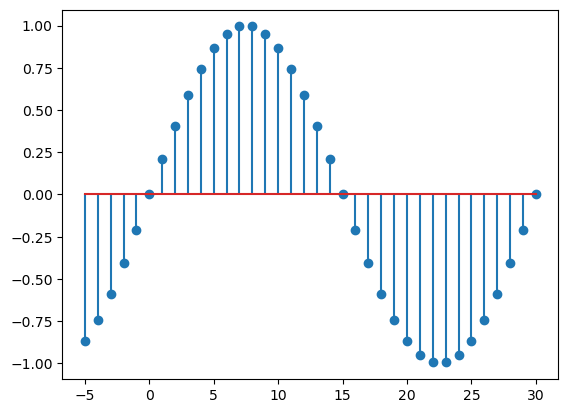

In [11]:
import matplotlib.pyplot as plt

n = np.arange(-5,31)
plt.stem(n, xd(n))

### Leitura de ficheiro de audoo em formato wav

O format _wav_ é uma norma para guardar num ficheiro um sinal em tempo discreto.

A biblioteca SciPy tem uma função para ler esse formato de ficheiros

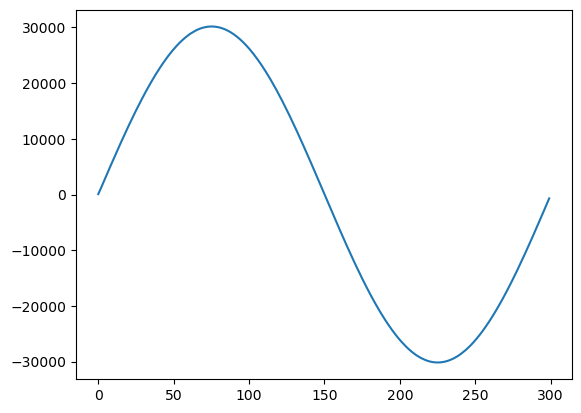

In [12]:
from scipy.io import wavfile
import matplotlib.pyplot as plt

fs = 132000
s = np.sin(2 * np.pi * 440 * np.arange(fs) / fs)

fs, s = wavfile.read('Sine_wave_440.wav')

n = np.arange(0,300)
plt.plot(n, s[n])

### Reproduzir um sinal de audio



In [13]:
from IPython.display import Audio
Audio(data=s, rate=fs)

